In [ ]:
from keras.datasets import cifar100
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Flatten, Dense

# Load CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data()


In [ ]:
# Normalize pixel values to range [0,1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
# One-hot encoding of labels
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

# Define the model
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(112, activation='relu'),
    Dense(56, activation='relu'),
    Dense(28, activation='relu'),
    Dense(100, activation='softmax')  # 100 output classes for CIFAR-100
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=880, batch_size=1000, validation_data=(x_test, y_test))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/880
50/50 ━━━━━━━━━━━━━━━━━━━━ 13s 216ms/step - accuracy: 0.0110 - loss: 4.6029 - val_accuracy: 0.0258 - val_loss: 4.5340
Epoch 2/880
50/50 ━━━━━━━━━━━━━━━━━━━━ 18s 175ms/step - accuracy: 0.0307 - loss: 4.4661 - val_accuracy: 0.0445 - val_loss: 4.2763
Epoch 3/880
50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 189ms/step - accuracy: 0.0521 - loss: 4.2155 - val_accuracy: 0.0677 - val_loss: 4.0781
Epoch 4/880
50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 189ms/step - accuracy: 0.0743 - loss: 4.0436 - val_accuracy: 0.0861 - val_loss: 3.9825
Epoch 5/880
50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 177ms/step - accuracy: 0.0900 - loss: 3.9449 - val_accuracy: 0.0968 - val_loss: 3.9168
Epoch 6/880
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 176ms/step - accuracy: 0.1023 - loss: 3.8733 - val_accuracy: 0.1105 - val_loss: 3.8331
Epoch 7/880
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 201ms/step - accuracy: 0.1139 - loss: 3.7915 - val_accuracy: 0.1189 - val_loss: 3.7776
Epoch 8/880
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 201ms/step - accuracy: 0.1239 - loss: 3.7324 - val

In [ ]:
model.save('hw_cifar100.keras')

In [3]:
from tensorflow import keras

# Load the saved model
model = keras.models.load_model('hw_cifar100.keras')

# Check the model summary to verify it loaded correctly
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 112)                 │          28,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 56)                  │           6,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 28)                  │           1,596 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 100)                 │           2,900 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,232,938 (19.96 MB)

 Trainable params: 1,744,312 (6.65 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,488,626 (13.31 MB)

In [9]:
class_names = [
       'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle',
       'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel',
       'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock',
       'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
       'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'goldfish',
       'gorilla', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower',
       'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle',
       'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter',
       'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate',
       'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket',
       'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail',
       'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper',
       'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train',
       'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow', 'wolf', 'woman',
       'worm'
   ]

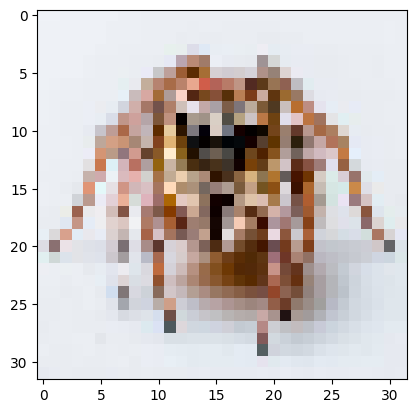

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predicted class: bee


In [16]:
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.utils import load_img
import matplotlib.pyplot as plt
import numpy as np

img = load_img('/content/download (3).jpg', target_size=(32, 32)) # Resize to 32x32
plt.imshow(img)
plt.show()
img = img_to_array(img)

# Reshape the image to match the input shape of the model
# img = img.reshape(1, 32*32*3) # Reshape to (1, 3072) - Incorrect
img = img.reshape(1, 32, 32, 3) # Reshape to (1, 32, 32, 3) - Correct shape for the model
img = img.astype('float32')
img = img / 255.0

np.argmax(model.predict(img), axis=1)
predicted_class_index = np.argmax(model.predict(img), axis=1)[0]
predicted_class_name = class_names[predicted_class_index]

print("Predicted class:", predicted_class_name)